In [0]:
!rm -rf *
!pip install scipy==1.2.1
!pip install ipython==7.4.0
!pip install -U -q zipfile36
!pip install -U -q PyDrive
!pip install -U -q hdbscan
!pip install -U -q dask_ml

!git clone https://github.com/kkahloots/Autoencoders.git
!mv ./Autoencoders/* ./
!mkdir experiments
import os
os.kill(os.getpid(), 9)

     |████████████████████████████████| 4.0MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 112kB 2.9MB/s 
Cloning into 'Autoencoders'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 213 (delta 8), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (213/213), 2.05 MiB | 20.94 MiB/s, done.
Resolving deltas: 100% (125/125), done.


In [0]:
import warnings
warnings.filterwarnings('ignore')

# Prepare the Dataset

In [0]:
dataset_name = 'mnist'

In [0]:
import numpy as np
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X, X_test))
y = np.concatenate((y, y_test)).flatten()
imgs = X
del X_test
del y_test

print('Dataset size {}'.format(X.shape))


Using TensorFlow backend.


Dataset size (70000, 28, 28)


# AE

In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
model_name = 'AE'

In [0]:
from models.AE import AE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
ae = AE(dataset_name, epochs=int(2e5), num_layers=3, latent_dim=3,
        hidden_dim=500, l_rate=1e-4, batch_size=64, plot=True, clustering=True, 
        colab=True, colabpath = '1w_Kz94Rcz_OuHUMlahEQMDQxGPrQuL7U')


 Processing data...
Scaling dataset
Training dataset shape:  (56000, 28, 28, 3)
Validation dataset shape:  (14000, 28, 28, 3)

 building a model...

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.

[*] Defining encoder...

Instructions for updating:
Use keras.layers.dense instead.
[*] Layer ( encoder/dense_1/Relu:0 ) output shape: [64, 500]
Instructions for updating:
Use keras.layers.dropout instead.
[*] Layer ( encoder/dense_1_dropout/Identity:0 ) output shape: [64, 500]
[*] Layer ( encoder/dense_2/Relu:0 ) output shape: [64, 500]
[*] Layer ( encoder/dense_2_dropout/Identity:0 ) output shape: [64, 500]
Instructions for updating:
Use keras.layers.batch_normalization instead.
[*] Layer ( encoder/H2_batch_norm/batchnorm/add_1:0 ) ou

  0%|          | 0/875 [00:00<?, ?it/s]

EPOCH:  0


100%|██████████| 218/218 [00:00<00:00, 426.84it/s]


TRAIN | AE Loss:  575.3086  | Recons:  575.30676  | L2_loss:  1848.8832
VALID | AE Loss:  475.4431  | Recons:  475.44116
zip experiments AE_mnist_latent_dim3_h_dim500_h_nl3.zip ...
uploading to google drive ...


  0%|          | 0/875 [00:00<?, ?it/s]

File ID: 14UviW6j_NvM85jbycTOUbqk4_TfAEOlk
EPOCH:  1


100%|██████████| 218/218 [00:00<00:00, 434.47it/s]


TRAIN | AE Loss:  460.85284  | Recons:  460.8507  | L2_loss:  2131.3145
VALID | AE Loss:  447.60553  | Recons:  447.60336
Saving model...
Model saved
Generating W space ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-1750 ...

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-1750


  9%|▉         | 83/875 [00:00<00:00, 829.98it/s]

Model loaded
EPOCHS trained:  1


100%|██████████| 875/875 [00:00<00:00, 943.40it/s]


W space dimensions: (56000, 2)
Ploting W space ...


  1%|          | 365/56000 [00:00<00:15, 3646.08it/s]

data size (56000, 2)


100%|██████████| 56000/56000 [00:16<00:00, 3421.34it/s]


Saving Image experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space in epoch 1.jpg ...
W space dimensions: (56000, 3)
Ploting W space ...


100%|██████████| 10/10 [00:00<00:00, 60.68it/s]

data size (56000, 3)
Saving Image experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space 3d in epoch 1.jpg ...


Generating Samples ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-1750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-1750


2it [00:00, 74.29it/s]               

Model loaded
EPOCHS trained:  1
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-1750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-1750



  0%|          | 0/1 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  1


2it [00:00, 110.95it/s]              


Saving Image  experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 samples generation in epoch 1.jpg
Generating W space ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-1750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-1750


  0%|          | 0/875 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  1


100%|██████████| 875/875 [00:01<00:00, 835.29it/s]


Init 1/3 with method: k-means++
Inertia for init 1/3: 95221.210938
Init 2/3 with method: k-means++
Inertia for init 2/3: 94673.843750
Init 3/3 with method: k-means++
Inertia for init 3/3: 97273.953125
Minibatch iteration 1/56000: mean batch inertia: 289.624883, ewa inertia: 289.624883 
Minibatch iteration 2/56000: mean batch inertia: 271.382539, ewa inertia: 289.559733 
Minibatch iteration 3/56000: mean batch inertia: 306.004355, ewa inertia: 289.618462 
Minibatch iteration 4/56000: mean batch inertia: 320.082305, ewa inertia: 289.727260 
Minibatch iteration 5/56000: mean batch inertia: 333.651406, ewa inertia: 289.884129 
Minibatch iteration 6/56000: mean batch inertia: 279.375156, ewa inertia: 289.846598 
Minibatch iteration 7/56000: mean batch inertia: 290.311855, ewa inertia: 289.848259 
Minibatch iteration 8/56000: mean batch inertia: 236.335898, ewa inertia: 289.657147 
Minibatch iteration 9/56000: mean batch inertia: 285.367422, ewa inertia: 289.641827 
Minibatch iteration 10/56

  0%|          | 0/218 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  1


219it [00:00, 763.51it/s]                         


Init 1/3 with method: k-means++
Inertia for init 1/3: 92621.328125
Init 2/3 with method: k-means++
Inertia for init 2/3: 84726.460938
Init 3/3 with method: k-means++
Inertia for init 3/3: 77517.203125
Minibatch iteration 1/14000: mean batch inertia: 327.318008, ewa inertia: 327.318008 
Minibatch iteration 2/14000: mean batch inertia: 270.499805, ewa inertia: 326.506377 
Minibatch iteration 3/14000: mean batch inertia: 231.373281, ewa inertia: 325.147430 
Minibatch iteration 4/14000: mean batch inertia: 265.891016, ewa inertia: 324.300970 
Minibatch iteration 5/14000: mean batch inertia: 252.291680, ewa inertia: 323.272340 
Minibatch iteration 6/14000: mean batch inertia: 266.016152, ewa inertia: 322.454452 
Minibatch iteration 7/14000: mean batch inertia: 232.116211, ewa inertia: 321.163998 
Minibatch iteration 8/14000: mean batch inertia: 272.504941, ewa inertia: 320.468919 
Minibatch iteration 9/14000: mean batch inertia: 272.301016, ewa inertia: 319.780855 
Minibatch iteration 10/14

  8%|▊         | 70/875 [00:00<00:01, 694.21it/s]

Model loaded
EPOCHS trained:  1


100%|██████████| 875/875 [00:01<00:00, 848.27it/s]


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-1750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-1750


  0%|          | 0/218 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  1


219it [00:00, 769.76it/s]                         


TRAIN | hdbscan Clustering Acc:  0.09516071428571428

  0%|          | 0/875 [00:00<?, ?it/s]


VALID | hdbscan Clustering Acc:  0.20407142857142857
EPOCH:  2


  0%|          | 0/875 [00:00<?, ?it/s]

TRAIN | AE Loss:  437.83856  | Recons:  437.83615  | L2_loss:  2401.1755
VALID | AE Loss:  429.55597  | Recons:  429.55344
EPOCH:  3


  0%|          | 0/875 [00:00<?, ?it/s]

TRAIN | AE Loss:  423.24014  | Recons:  423.23755  | L2_loss:  2643.6726
VALID | AE Loss:  418.34183  | Recons:  418.33902
EPOCH:  4


  0%|          | 1/875 [00:00<02:33,  5.71it/s]

TRAIN | AE Loss:  413.7072  | Recons:  413.7043  | L2_loss:  2863.5256
VALID | AE Loss:  410.51764  | Recons:  410.51468
EPOCH:  5


  0%|          | 1/875 [00:00<02:32,  5.73it/s]

TRAIN | AE Loss:  406.89044  | Recons:  406.88736  | L2_loss:  3066.0056
VALID | AE Loss:  404.62802  | Recons:  404.62485
EPOCH:  6


  0%|          | 1/875 [00:00<02:34,  5.67it/s]

TRAIN | AE Loss:  401.80246  | Recons:  401.79922  | L2_loss:  3255.9775
VALID | AE Loss:  400.51913  | Recons:  400.51578
EPOCH:  7


  0%|          | 1/875 [00:00<02:31,  5.76it/s]

TRAIN | AE Loss:  397.8278  | Recons:  397.82437  | L2_loss:  3432.2703
VALID | AE Loss:  397.35242  | Recons:  397.34888
EPOCH:  8


  0%|          | 1/875 [00:00<02:32,  5.74it/s]

TRAIN | AE Loss:  394.66373  | Recons:  394.66016  | L2_loss:  3592.1824
VALID | AE Loss:  395.08923  | Recons:  395.08557
EPOCH:  9


  0%|          | 1/875 [00:00<02:31,  5.76it/s]

TRAIN | AE Loss:  392.03915  | Recons:  392.0354  | L2_loss:  3737.8103
VALID | AE Loss:  392.97833  | Recons:  392.97452
EPOCH:  10


  0%|          | 1/875 [00:00<02:32,  5.73it/s]

TRAIN | AE Loss:  389.73444  | Recons:  389.73056  | L2_loss:  3871.0369
VALID | AE Loss:  391.2227  | Recons:  391.2188
EPOCH:  11


  0%|          | 1/875 [00:00<02:46,  5.24it/s]

TRAIN | AE Loss:  387.65472  | Recons:  387.65073  | L2_loss:  3986.5466
VALID | AE Loss:  389.49585  | Recons:  389.49182
EPOCH:  12


  0%|          | 1/875 [00:00<02:30,  5.81it/s]

TRAIN | AE Loss:  385.7257  | Recons:  385.72165  | L2_loss:  4083.867
VALID | AE Loss:  388.19547  | Recons:  388.19138
EPOCH:  13


  0%|          | 1/875 [00:00<02:29,  5.83it/s]

TRAIN | AE Loss:  383.92987  | Recons:  383.9257  | L2_loss:  4161.0176
VALID | AE Loss:  386.70456  | Recons:  386.7004
EPOCH:  14


  0%|          | 1/875 [00:00<02:42,  5.37it/s]

TRAIN | AE Loss:  382.2184  | Recons:  382.21417  | L2_loss:  4217.148
VALID | AE Loss:  385.4282  | Recons:  385.42395
EPOCH:  15


  0%|          | 1/875 [00:00<02:29,  5.85it/s]

TRAIN | AE Loss:  380.57428  | Recons:  380.57  | L2_loss:  4257.014
VALID | AE Loss:  384.19366  | Recons:  384.18936
EPOCH:  16


  0%|          | 1/875 [00:00<02:32,  5.75it/s]

TRAIN | AE Loss:  379.04214  | Recons:  379.03787  | L2_loss:  4288.1636
VALID | AE Loss:  383.06522  | Recons:  383.0609
EPOCH:  17


  0%|          | 1/875 [00:00<02:29,  5.83it/s]

TRAIN | AE Loss:  377.62186  | Recons:  377.6175  | L2_loss:  4316.5586
VALID | AE Loss:  382.23535  | Recons:  382.23102
EPOCH:  18


  0%|          | 1/875 [00:00<02:31,  5.76it/s]

TRAIN | AE Loss:  376.31158  | Recons:  376.30722  | L2_loss:  4347.711
VALID | AE Loss:  381.3583  | Recons:  381.35394
EPOCH:  19


  0%|          | 1/875 [00:00<02:31,  5.78it/s]

TRAIN | AE Loss:  375.05637  | Recons:  375.05197  | L2_loss:  4381.284
VALID | AE Loss:  380.51547  | Recons:  380.5111
EPOCH:  20


100%|██████████| 218/218 [00:00<00:00, 514.53it/s]


TRAIN | AE Loss:  373.879  | Recons:  373.87457  | L2_loss:  4415.3804
VALID | AE Loss:  379.74026  | Recons:  379.7358
Saving model...
Model saved
Generating W space ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-18375 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-18375


  9%|▉         | 78/875 [00:00<00:01, 774.72it/s]

Model loaded
EPOCHS trained:  20


100%|██████████| 875/875 [00:00<00:00, 970.66it/s]


W space dimensions: (56000, 2)
Ploting W space ...


  1%|          | 420/56000 [00:00<00:13, 4192.79it/s]

data size (56000, 2)


100%|██████████| 56000/56000 [00:18<00:00, 3009.02it/s]


Saving Image experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space in epoch 20.jpg ...
W space dimensions: (56000, 3)
Ploting W space ...


100%|██████████| 10/10 [00:00<00:00, 61.89it/s]

data size (56000, 3)
Saving Image experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space 3d in epoch 20.jpg ...


Generating Samples ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-18375 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-18375


2it [00:00, 73.11it/s]               

Model loaded
EPOCHS trained:  20
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-18375 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-18375



2it [00:00, 111.66it/s]              

Model loaded
EPOCHS trained:  20


Saving Image  experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 samples generation in epoch 20.jpg
Generating W space ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-18375 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-18375


  0%|          | 0/875 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  20


100%|██████████| 875/875 [00:01<00:00, 852.41it/s]


Init 1/3 with method: k-means++
Inertia for init 1/3: 145615.453125
Init 2/3 with method: k-means++
Inertia for init 2/3: 177824.281250
Init 3/3 with method: k-means++
Inertia for init 3/3: 170884.406250
Minibatch iteration 1/56000: mean batch inertia: 529.541602, ewa inertia: 529.541602 
Minibatch iteration 2/56000: mean batch inertia: 556.078477, ewa inertia: 529.636374 
Minibatch iteration 3/56000: mean batch inertia: 447.123047, ewa inertia: 529.341689 
Minibatch iteration 4/56000: mean batch inertia: 461.511602, ewa inertia: 529.099443 
Minibatch iteration 5/56000: mean batch inertia: 481.551719, ewa inertia: 528.929633 
Minibatch iteration 6/56000: mean batch inertia: 518.595469, ewa inertia: 528.892726 
Minibatch iteration 7/56000: mean batch inertia: 459.852461, ewa inertia: 528.646158 
Minibatch iteration 8/56000: mean batch inertia: 435.053516, ewa inertia: 528.311904 
Minibatch iteration 9/56000: mean batch inertia: 464.883828, ewa inertia: 528.085380 
Minibatch iteration 10

  0%|          | 0/218 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  20


219it [00:00, 782.32it/s]                         


Init 1/3 with method: k-means++
Inertia for init 1/3: 159769.968750
Init 2/3 with method: k-means++
Inertia for init 2/3: 163427.765625
Init 3/3 with method: k-means++
Inertia for init 3/3: 157229.093750
Minibatch iteration 1/14000: mean batch inertia: 424.836211, ewa inertia: 424.836211 
Minibatch iteration 2/14000: mean batch inertia: 453.587734, ewa inertia: 425.246918 
Minibatch iteration 3/14000: mean batch inertia: 441.179414, ewa inertia: 425.474508 
Minibatch iteration 4/14000: mean batch inertia: 480.959219, ewa inertia: 426.267091 
Minibatch iteration 5/14000: mean batch inertia: 424.477031, ewa inertia: 426.241520 
Minibatch iteration 6/14000: mean batch inertia: 418.830195, ewa inertia: 426.135652 
Minibatch iteration 7/14000: mean batch inertia: 418.579258, ewa inertia: 426.027711 
Minibatch iteration 8/14000: mean batch inertia: 392.519531, ewa inertia: 425.549057 
Minibatch iteration 9/14000: mean batch inertia: 425.022695, ewa inertia: 425.541538 
Minibatch iteration 10

  7%|▋         | 62/875 [00:00<00:01, 619.35it/s]

Model loaded
EPOCHS trained:  20


100%|██████████| 875/875 [00:01<00:00, 836.57it/s]


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-18375 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-18375


  0%|          | 0/218 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  20


219it [00:00, 737.62it/s]                         


TRAIN | hdbscan Clustering Acc:  0.05230357142857143
VALID | hdbscan Clustering Acc:  0.005571428571428572


  0%|          | 1/875 [00:00<02:32,  5.73it/s]

EPOCH:  21


  0%|          | 1/875 [00:00<02:29,  5.84it/s]

TRAIN | AE Loss:  372.76263  | Recons:  372.7582  | L2_loss:  4449.8906
VALID | AE Loss:  379.02274  | Recons:  379.01828
EPOCH:  22


  0%|          | 1/875 [00:00<02:36,  5.59it/s]

TRAIN | AE Loss:  371.6922  | Recons:  371.68774  | L2_loss:  4484.7505
VALID | AE Loss:  378.50867  | Recons:  378.50412
EPOCH:  23


  0%|          | 1/875 [00:00<02:29,  5.86it/s]

TRAIN | AE Loss:  370.6857  | Recons:  370.6812  | L2_loss:  4519.194
VALID | AE Loss:  377.78275  | Recons:  377.77823
EPOCH:  24


  0%|          | 1/875 [00:00<02:32,  5.75it/s]

TRAIN | AE Loss:  369.68253  | Recons:  369.678  | L2_loss:  4554.623
VALID | AE Loss:  377.0582  | Recons:  377.05362
EPOCH:  25


  0%|          | 1/875 [00:00<02:32,  5.72it/s]

TRAIN | AE Loss:  368.77283  | Recons:  368.76825  | L2_loss:  4591.1777
VALID | AE Loss:  376.7169  | Recons:  376.7123
EPOCH:  26


  0%|          | 1/875 [00:00<02:32,  5.71it/s]

TRAIN | AE Loss:  367.84253  | Recons:  367.83792  | L2_loss:  4629.6865
VALID | AE Loss:  376.1005  | Recons:  376.09583
EPOCH:  27


  0%|          | 1/875 [00:00<02:29,  5.84it/s]

TRAIN | AE Loss:  366.9879  | Recons:  366.98328  | L2_loss:  4670.6836
VALID | AE Loss:  375.57053  | Recons:  375.56583
EPOCH:  28


  0%|          | 1/875 [00:00<02:28,  5.87it/s]

TRAIN | AE Loss:  366.09607  | Recons:  366.09137  | L2_loss:  4714.1465
VALID | AE Loss:  374.89404  | Recons:  374.88925
EPOCH:  29


  0%|          | 1/875 [00:00<02:28,  5.88it/s]

TRAIN | AE Loss:  365.2821  | Recons:  365.2773  | L2_loss:  4760.75
VALID | AE Loss:  374.48132  | Recons:  374.47653
EPOCH:  30


  0%|          | 1/875 [00:00<02:46,  5.26it/s]

TRAIN | AE Loss:  364.47586  | Recons:  364.47107  | L2_loss:  4808.5103
VALID | AE Loss:  374.08716  | Recons:  374.08237
EPOCH:  31


  0%|          | 1/875 [00:00<02:30,  5.80it/s]

TRAIN | AE Loss:  363.71994  | Recons:  363.71506  | L2_loss:  4858.0615
VALID | AE Loss:  373.50363  | Recons:  373.49875
EPOCH:  32


  0%|          | 1/875 [00:00<02:32,  5.73it/s]

TRAIN | AE Loss:  362.94385  | Recons:  362.93893  | L2_loss:  4907.424
VALID | AE Loss:  373.1385  | Recons:  373.13358
EPOCH:  33


  0%|          | 1/875 [00:00<02:46,  5.25it/s]

TRAIN | AE Loss:  362.32343  | Recons:  362.31845  | L2_loss:  4957.6826
VALID | AE Loss:  372.56207  | Recons:  372.55707
EPOCH:  34


  0%|          | 1/875 [00:00<02:30,  5.81it/s]

TRAIN | AE Loss:  361.57062  | Recons:  361.5656  | L2_loss:  5007.2886
VALID | AE Loss:  372.2619  | Recons:  372.25687
EPOCH:  35


  0%|          | 1/875 [00:00<02:29,  5.85it/s]

TRAIN | AE Loss:  360.9528  | Recons:  360.94775  | L2_loss:  5056.7983
VALID | AE Loss:  371.96674  | Recons:  371.96164
EPOCH:  36


  0%|          | 1/875 [00:00<02:31,  5.78it/s]

TRAIN | AE Loss:  360.2396  | Recons:  360.2345  | L2_loss:  5105.3228
VALID | AE Loss:  371.56863  | Recons:  371.5635
EPOCH:  37


  0%|          | 1/875 [00:00<02:30,  5.82it/s]

TRAIN | AE Loss:  359.60037  | Recons:  359.5952  | L2_loss:  5154.392
VALID | AE Loss:  371.23926  | Recons:  371.2341
EPOCH:  38


  0%|          | 1/875 [00:00<02:29,  5.85it/s]

TRAIN | AE Loss:  359.00677  | Recons:  359.00156  | L2_loss:  5202.9033
VALID | AE Loss:  370.95337  | Recons:  370.94815
EPOCH:  39


  0%|          | 1/875 [00:00<02:50,  5.14it/s]

TRAIN | AE Loss:  358.45743  | Recons:  358.45215  | L2_loss:  5251.094
VALID | AE Loss:  370.70306  | Recons:  370.69778
EPOCH:  40


100%|██████████| 218/218 [00:00<00:00, 504.36it/s]


TRAIN | AE Loss:  357.88364  | Recons:  357.87836  | L2_loss:  5298.5483
VALID | AE Loss:  370.31766  | Recons:  370.31235
Saving model...
Model saved
Generating W space ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-35875 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-35875


  0%|          | 0/875 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  40


100%|██████████| 875/875 [00:00<00:00, 973.45it/s]


W space dimensions: (56000, 2)
Ploting W space ...


  1%|          | 418/56000 [00:00<00:13, 4177.36it/s]

data size (56000, 2)


100%|██████████| 56000/56000 [00:18<00:00, 2973.98it/s]


Saving Image experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space in epoch 40.jpg ...
W space dimensions: (56000, 3)
Ploting W space ...


100%|██████████| 10/10 [00:00<00:00, 62.10it/s]

data size (56000, 3)
Saving Image experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space 3d in epoch 40.jpg ...


Generating Samples ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-35875 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-35875


  0%|          | 0/1 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  40


2it [00:00, 59.58it/s]               

Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-35875 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-35875



2it [00:00, 96.66it/s]               

Model loaded
EPOCHS trained:  40


Saving Image  experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 samples generation in epoch 40.jpg
Generating W space ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-35875 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-35875
Model loaded


  7%|▋         | 60/875 [00:00<00:01, 591.54it/s]

EPOCHS trained:  40


100%|██████████| 875/875 [00:01<00:00, 847.42it/s]


Init 1/3 with method: k-means++
Inertia for init 1/3: 122434.343750
Init 2/3 with method: k-means++
Inertia for init 2/3: 131321.156250
Init 3/3 with method: k-means++
Inertia for init 3/3: 134382.187500
Minibatch iteration 1/56000: mean batch inertia: 406.702148, ewa inertia: 406.702148 
Minibatch iteration 2/56000: mean batch inertia: 493.834141, ewa inertia: 407.013329 
Minibatch iteration 3/56000: mean batch inertia: 370.929766, ewa inertia: 406.884461 
Minibatch iteration 4/56000: mean batch inertia: 349.912734, ewa inertia: 406.680994 
Minibatch iteration 5/56000: mean batch inertia: 416.946172, ewa inertia: 406.717655 
Minibatch iteration 6/56000: mean batch inertia: 366.955234, ewa inertia: 406.575649 
Minibatch iteration 7/56000: mean batch inertia: 345.696836, ewa inertia: 406.358228 
Minibatch iteration 8/56000: mean batch inertia: 411.697852, ewa inertia: 406.377298 
Minibatch iteration 9/56000: mean batch inertia: 377.709531, ewa inertia: 406.274915 
Minibatch iteration 10

  0%|          | 0/218 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  40


219it [00:00, 777.05it/s]                         


Init 1/3 with method: k-means++
Inertia for init 1/3: 138187.296875
Init 2/3 with method: k-means++
Inertia for init 2/3: 131782.250000
Init 3/3 with method: k-means++
Inertia for init 3/3: 131494.796875
Minibatch iteration 1/14000: mean batch inertia: 459.801250, ewa inertia: 459.801250 
Minibatch iteration 2/14000: mean batch inertia: 469.371445, ewa inertia: 459.937957 
Minibatch iteration 3/14000: mean batch inertia: 353.720078, ewa inertia: 458.420667 
Minibatch iteration 4/14000: mean batch inertia: 398.553359, ewa inertia: 457.565481 
Minibatch iteration 5/14000: mean batch inertia: 465.451016, ewa inertia: 457.678124 
Minibatch iteration 6/14000: mean batch inertia: 409.557148, ewa inertia: 456.990730 
Minibatch iteration 7/14000: mean batch inertia: 431.983633, ewa inertia: 456.633512 
Minibatch iteration 8/14000: mean batch inertia: 347.610898, ewa inertia: 455.076157 
Minibatch iteration 9/14000: mean batch inertia: 342.728594, ewa inertia: 453.471306 
Minibatch iteration 10

  7%|▋         | 58/875 [00:00<00:01, 579.37it/s]

40


100%|██████████| 875/875 [00:01<00:00, 848.29it/s]


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-35875 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-35875


  0%|          | 0/218 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  40


219it [00:00, 762.62it/s]                         


TRAIN | hdbscan Clustering Acc:  0.00175
VALID | hdbscan Clustering Acc:  0.002142857142857143

  0%|          | 1/875 [00:00<02:33,  5.70it/s]


EPOCH:  41


  0%|          | 1/875 [00:00<02:31,  5.77it/s]

TRAIN | AE Loss:  357.37936  | Recons:  357.374  | L2_loss:  5346.0024
VALID | AE Loss:  370.33688  | Recons:  370.33148
total loss Patience count:  1
EPOCH:  42


  0%|          | 0/875 [00:00<?, ?it/s]

TRAIN | AE Loss:  356.90335  | Recons:  356.89795  | L2_loss:  5392.191
VALID | AE Loss:  369.93338  | Recons:  369.92798
EPOCH:  43


  0%|          | 1/875 [00:00<02:32,  5.72it/s]

TRAIN | AE Loss:  356.34778  | Recons:  356.34235  | L2_loss:  5437.7866
VALID | AE Loss:  369.71158  | Recons:  369.70615
EPOCH:  44


  0%|          | 1/875 [00:00<02:30,  5.82it/s]

TRAIN | AE Loss:  355.877  | Recons:  355.87158  | L2_loss:  5482.9326
VALID | AE Loss:  369.6407  | Recons:  369.6352
EPOCH:  45


  0%|          | 1/875 [00:00<02:33,  5.70it/s]

TRAIN | AE Loss:  355.38428  | Recons:  355.37878  | L2_loss:  5527.5747
VALID | AE Loss:  369.57675  | Recons:  369.57117
EPOCH:  46


  0%|          | 1/875 [00:00<02:30,  5.80it/s]

TRAIN | AE Loss:  355.01  | Recons:  355.00443  | L2_loss:  5572.667
VALID | AE Loss:  369.43585  | Recons:  369.43027
EPOCH:  47


  0%|          | 1/875 [00:00<02:44,  5.32it/s]

TRAIN | AE Loss:  354.53427  | Recons:  354.5287  | L2_loss:  5616.5293
VALID | AE Loss:  369.14743  | Recons:  369.14185
EPOCH:  48


  0%|          | 1/875 [00:00<02:28,  5.87it/s]

TRAIN | AE Loss:  354.18726  | Recons:  354.18158  | L2_loss:  5660.4844
VALID | AE Loss:  369.12418  | Recons:  369.11856
EPOCH:  49


  0%|          | 1/875 [00:00<02:29,  5.84it/s]

TRAIN | AE Loss:  353.75  | Recons:  353.7443  | L2_loss:  5703.0986
VALID | AE Loss:  369.28513  | Recons:  369.2794
total loss Patience count:  1
EPOCH:  50


100%|██████████| 218/218 [00:00<00:00, 535.27it/s]


TRAIN | AE Loss:  353.38672  | Recons:  353.38095  | L2_loss:  5745.226
VALID | AE Loss:  368.68237  | Recons:  368.6766
zip experiments AE_mnist_latent_dim3_h_dim500_h_nl3.zip ...
uploading to google drive ...


  0%|          | 1/875 [00:00<02:38,  5.50it/s]

File ID: 1CPLRO_bo3ItWWHI_lCEenGYVCmAne6EP
EPOCH:  51


  0%|          | 1/875 [00:00<02:32,  5.74it/s]

TRAIN | AE Loss:  352.93207  | Recons:  352.9263  | L2_loss:  5787.1167
VALID | AE Loss:  368.68585  | Recons:  368.68005
total loss Patience count:  1
EPOCH:  52


  0%|          | 1/875 [00:00<02:31,  5.77it/s]

TRAIN | AE Loss:  352.57196  | Recons:  352.56613  | L2_loss:  5829.2686
VALID | AE Loss:  368.5541  | Recons:  368.54825
EPOCH:  53


  0%|          | 1/875 [00:00<02:43,  5.33it/s]

TRAIN | AE Loss:  352.1231  | Recons:  352.11722  | L2_loss:  5870.4673
VALID | AE Loss:  368.4611  | Recons:  368.4552
EPOCH:  54


  0%|          | 1/875 [00:00<02:30,  5.80it/s]

TRAIN | AE Loss:  351.81464  | Recons:  351.80872  | L2_loss:  5911.329
VALID | AE Loss:  368.25095  | Recons:  368.24493
EPOCH:  55


  0%|          | 1/875 [00:00<02:32,  5.74it/s]

TRAIN | AE Loss:  351.58017  | Recons:  351.57422  | L2_loss:  5951.856
VALID | AE Loss:  368.32202  | Recons:  368.31604
total loss Patience count:  1
EPOCH:  56


  0%|          | 1/875 [00:00<02:28,  5.89it/s]

TRAIN | AE Loss:  351.22894  | Recons:  351.22293  | L2_loss:  5992.4204
VALID | AE Loss:  367.98413  | Recons:  367.97815
EPOCH:  57


  0%|          | 1/875 [00:00<02:36,  5.59it/s]

TRAIN | AE Loss:  350.86636  | Recons:  350.8603  | L2_loss:  6032.575
VALID | AE Loss:  367.8898  | Recons:  367.88376
EPOCH:  58


  0%|          | 1/875 [00:00<02:27,  5.94it/s]

TRAIN | AE Loss:  350.5525  | Recons:  350.54642  | L2_loss:  6072.0938
VALID | AE Loss:  368.14056  | Recons:  368.13446
total loss Patience count:  1
EPOCH:  59


  0%|          | 0/875 [00:00<?, ?it/s]

TRAIN | AE Loss:  350.2874  | Recons:  350.2813  | L2_loss:  6112.4136
VALID | AE Loss:  367.80118  | Recons:  367.79504
EPOCH:  60


100%|██████████| 218/218 [00:00<00:00, 540.48it/s]


TRAIN | AE Loss:  349.91678  | Recons:  349.91064  | L2_loss:  6151.92
VALID | AE Loss:  367.84705  | Recons:  367.84088
Saving model...
Model saved
Generating W space ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-53375 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-53375


  0%|          | 0/875 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  60


100%|██████████| 875/875 [00:00<00:00, 1002.39it/s]


W space dimensions: (56000, 2)
Ploting W space ...


  1%|          | 429/56000 [00:00<00:12, 4284.38it/s]

data size (56000, 2)


100%|██████████| 56000/56000 [00:17<00:00, 3264.78it/s]


Saving Image experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space in epoch 60.jpg ...
W space dimensions: (56000, 3)
Ploting W space ...


100%|██████████| 10/10 [00:00<00:00, 62.10it/s]

data size (56000, 3)
Saving Image experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space 3d in epoch 60.jpg ...


Generating Samples ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-53375 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-53375
Model loaded


2it [00:00, 58.75it/s]               

EPOCHS trained:  60
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-53375 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-53375



2it [00:00, 73.99it/s]               

Model loaded
EPOCHS trained:  60


Saving Image  experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 samples generation in epoch 60.jpg
Generating W space ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-53375 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-53375
Model loaded


  7%|▋         | 61/875 [00:00<00:01, 607.60it/s]

EPOCHS trained:  60


100%|██████████| 875/875 [00:01<00:00, 843.53it/s]


Init 1/3 with method: k-means++
Inertia for init 1/3: 110956.203125
Init 2/3 with method: k-means++
Inertia for init 2/3: 108850.890625
Init 3/3 with method: k-means++
Inertia for init 3/3: 105445.765625
Minibatch iteration 1/56000: mean batch inertia: 377.384648, ewa inertia: 377.384648 
Minibatch iteration 2/56000: mean batch inertia: 403.642852, ewa inertia: 377.478426 
Minibatch iteration 3/56000: mean batch inertia: 316.355273, ewa inertia: 377.260133 
Minibatch iteration 4/56000: mean batch inertia: 430.635156, ewa inertia: 377.450755 
Minibatch iteration 5/56000: mean batch inertia: 346.930781, ewa inertia: 377.341757 
Minibatch iteration 6/56000: mean batch inertia: 354.070664, ewa inertia: 377.258647 
Minibatch iteration 7/56000: mean batch inertia: 390.123047, ewa inertia: 377.304591 
Minibatch iteration 8/56000: mean batch inertia: 325.780430, ewa inertia: 377.120579 
Minibatch iteration 9/56000: mean batch inertia: 316.096914, ewa inertia: 376.902641 
Minibatch iteration 10

  0%|          | 0/218 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  60


219it [00:00, 738.97it/s]                         


Init 1/3 with method: k-means++
Inertia for init 1/3: 105668.390625
Init 2/3 with method: k-means++
Inertia for init 2/3: 97850.695312
Init 3/3 with method: k-means++
Inertia for init 3/3: 100839.562500
Minibatch iteration 1/14000: mean batch inertia: 366.836758, ewa inertia: 366.836758 
Minibatch iteration 2/14000: mean batch inertia: 290.792598, ewa inertia: 365.750490 
Minibatch iteration 3/14000: mean batch inertia: 397.538359, ewa inertia: 366.204570 
Minibatch iteration 4/14000: mean batch inertia: 414.767812, ewa inertia: 366.898281 
Minibatch iteration 5/14000: mean batch inertia: 349.506523, ewa inertia: 366.649845 
Minibatch iteration 6/14000: mean batch inertia: 330.594648, ewa inertia: 366.134808 
Minibatch iteration 7/14000: mean batch inertia: 319.793965, ewa inertia: 365.472843 
Minibatch iteration 8/14000: mean batch inertia: 311.303379, ewa inertia: 364.699049 
Minibatch iteration 9/14000: mean batch inertia: 318.542090, ewa inertia: 364.039711 
Minibatch iteration 10/

  6%|▌         | 54/875 [00:00<00:01, 537.86it/s]


EPOCHS trained:  60


100%|██████████| 875/875 [00:01<00:00, 857.87it/s]


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-53375 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-53375


  0%|          | 0/218 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  60


219it [00:00, 729.94it/s]                         


TRAIN | hdbscan Clustering Acc:  0.003892857142857143
VALID | hdbscan Clustering Acc:  0.0015

  0%|          | 1/875 [00:00<02:31,  5.76it/s]


total loss Patience count:  1
EPOCH:  61


  0%|          | 1/875 [00:00<02:29,  5.86it/s]

TRAIN | AE Loss:  349.58408  | Recons:  349.57785  | L2_loss:  6190.538
VALID | AE Loss:  367.7714  | Recons:  367.7652
EPOCH:  62


  0%|          | 1/875 [00:00<02:32,  5.71it/s]

TRAIN | AE Loss:  349.2681  | Recons:  349.26187  | L2_loss:  6229.4927
VALID | AE Loss:  367.86316  | Recons:  367.8569
total loss Patience count:  1
EPOCH:  63


  0%|          | 1/875 [00:00<02:31,  5.78it/s]

TRAIN | AE Loss:  349.0645  | Recons:  349.05826  | L2_loss:  6268.892
VALID | AE Loss:  367.58292  | Recons:  367.57663
EPOCH:  64


  0%|          | 1/875 [00:00<02:31,  5.76it/s]

TRAIN | AE Loss:  348.73523  | Recons:  348.72894  | L2_loss:  6307.6836
VALID | AE Loss:  367.76807  | Recons:  367.7617
total loss Patience count:  1
EPOCH:  65


  0%|          | 1/875 [00:00<02:33,  5.70it/s]

TRAIN | AE Loss:  348.52692  | Recons:  348.52063  | L2_loss:  6345.7876
VALID | AE Loss:  367.77988  | Recons:  367.77347
total loss Patience count:  2
EPOCH:  66


  0%|          | 1/875 [00:00<02:30,  5.80it/s]

TRAIN | AE Loss:  348.2368  | Recons:  348.2304  | L2_loss:  6384.2524
VALID | AE Loss:  367.4096  | Recons:  367.4032
EPOCH:  67


  0%|          | 1/875 [00:00<02:33,  5.70it/s]

TRAIN | AE Loss:  347.92883  | Recons:  347.92236  | L2_loss:  6422.254
VALID | AE Loss:  367.68512  | Recons:  367.67874
total loss Patience count:  1
EPOCH:  68


  0%|          | 1/875 [00:00<02:29,  5.83it/s]

TRAIN | AE Loss:  347.64056  | Recons:  347.6341  | L2_loss:  6460.3906
VALID | AE Loss:  367.5397  | Recons:  367.53326
total loss Patience count:  2
EPOCH:  69


  0%|          | 1/875 [00:00<02:28,  5.89it/s]

TRAIN | AE Loss:  347.45135  | Recons:  347.44485  | L2_loss:  6498.6924
VALID | AE Loss:  367.89807  | Recons:  367.89157
total loss Patience count:  3
EPOCH:  70


  0%|          | 1/875 [00:00<02:42,  5.38it/s]

TRAIN | AE Loss:  347.11935  | Recons:  347.1128  | L2_loss:  6536.2056
VALID | AE Loss:  367.26813  | Recons:  367.26157
EPOCH:  71


  0%|          | 1/875 [00:00<02:31,  5.78it/s]

TRAIN | AE Loss:  346.93457  | Recons:  346.928  | L2_loss:  6574.0054
VALID | AE Loss:  367.4138  | Recons:  367.4072
total loss Patience count:  1
EPOCH:  72


  0%|          | 1/875 [00:00<02:32,  5.74it/s]

TRAIN | AE Loss:  346.7978  | Recons:  346.79114  | L2_loss:  6612.0054
VALID | AE Loss:  367.38412  | Recons:  367.3775
total loss Patience count:  2
EPOCH:  73


  0%|          | 1/875 [00:00<02:40,  5.44it/s]

TRAIN | AE Loss:  346.5255  | Recons:  346.51886  | L2_loss:  6650.724
VALID | AE Loss:  367.62802  | Recons:  367.6213
total loss Patience count:  3
EPOCH:  74


  0%|          | 1/875 [00:00<02:29,  5.86it/s]

TRAIN | AE Loss:  346.22156  | Recons:  346.21484  | L2_loss:  6688.313
VALID | AE Loss:  367.25192  | Recons:  367.24527
EPOCH:  75


  0%|          | 1/875 [00:00<02:28,  5.90it/s]

TRAIN | AE Loss:  345.95724  | Recons:  345.9505  | L2_loss:  6726.0938
VALID | AE Loss:  367.36163  | Recons:  367.35492
total loss Patience count:  1
EPOCH:  76


  0%|          | 1/875 [00:00<02:28,  5.87it/s]

TRAIN | AE Loss:  345.78378  | Recons:  345.77704  | L2_loss:  6763.8447
VALID | AE Loss:  367.5127  | Recons:  367.50592
total loss Patience count:  2
EPOCH:  77


  0%|          | 1/875 [00:00<02:28,  5.87it/s]

TRAIN | AE Loss:  345.58432  | Recons:  345.57755  | L2_loss:  6800.552
VALID | AE Loss:  367.47714  | Recons:  367.47034
total loss Patience count:  3
EPOCH:  78


  0%|          | 1/875 [00:00<02:29,  5.86it/s]

TRAIN | AE Loss:  345.44498  | Recons:  345.43814  | L2_loss:  6837.393
VALID | AE Loss:  367.1599  | Recons:  367.153
EPOCH:  79


  0%|          | 1/875 [00:00<02:27,  5.92it/s]

TRAIN | AE Loss:  345.19568  | Recons:  345.18878  | L2_loss:  6874.0513
VALID | AE Loss:  367.1961  | Recons:  367.1892
total loss Patience count:  1
EPOCH:  80


100%|██████████| 218/218 [00:00<00:00, 537.61it/s]


TRAIN | AE Loss:  344.891  | Recons:  344.88416  | L2_loss:  6910.537
VALID | AE Loss:  367.38403  | Recons:  367.37708
Saving model...
Model saved
Generating W space ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-70875 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-70875


  5%|▍         | 43/875 [00:00<00:01, 429.32it/s]

Model loaded
EPOCHS trained:  80


100%|██████████| 875/875 [00:00<00:00, 947.19it/s]


W space dimensions: (56000, 2)
Ploting W space ...


  1%|          | 435/56000 [00:00<00:12, 4349.66it/s]

data size (56000, 2)


100%|██████████| 56000/56000 [00:18<00:00, 3043.18it/s]


Saving Image experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space in epoch 80.jpg ...
W space dimensions: (56000, 3)
Ploting W space ...


100%|██████████| 10/10 [00:00<00:00, 58.50it/s]

data size (56000, 3)


Saving Image experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space 3d in epoch 80.jpg ...
Generating Samples ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-70875 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-70875


2it [00:00, 49.83it/s]               

Model loaded
EPOCHS trained:  80
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-70875 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-70875



2it [00:00, 70.49it/s]               

Model loaded
EPOCHS trained:  80


Saving Image  experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 samples generation in epoch 80.jpg
Generating W space ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-70875 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-70875


  6%|▌         | 54/875 [00:00<00:01, 535.68it/s]

Model loaded
EPOCHS trained:  80


100%|██████████| 875/875 [00:01<00:00, 843.26it/s]


Init 1/3 with method: k-means++
Inertia for init 1/3: 101406.351562
Init 2/3 with method: k-means++
Inertia for init 2/3: 104412.015625
Init 3/3 with method: k-means++
Inertia for init 3/3: 114408.945312
Minibatch iteration 1/56000: mean batch inertia: 352.939727, ewa inertia: 352.939727 
Minibatch iteration 2/56000: mean batch inertia: 320.905605, ewa inertia: 352.825321 
Minibatch iteration 3/56000: mean batch inertia: 343.100898, ewa inertia: 352.790592 
Minibatch iteration 4/56000: mean batch inertia: 312.638691, ewa inertia: 352.647194 
Minibatch iteration 5/56000: mean batch inertia: 371.780156, ewa inertia: 352.715525 
Minibatch iteration 6/56000: mean batch inertia: 343.007070, ewa inertia: 352.680853 
Minibatch iteration 7/56000: mean batch inertia: 392.810156, ewa inertia: 352.824169 
Minibatch iteration 8/56000: mean batch inertia: 380.518047, ewa inertia: 352.923074 
Minibatch iteration 9/56000: mean batch inertia: 398.007617, ewa inertia: 353.084088 
Minibatch iteration 10

  0%|          | 0/218 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  80


219it [00:00, 753.14it/s]                         


Init 1/3 with method: k-means++
Inertia for init 1/3: 107401.593750
Init 2/3 with method: k-means++
Inertia for init 2/3: 105655.140625
Init 3/3 with method: k-means++
Inertia for init 3/3: 96345.218750
Minibatch iteration 1/14000: mean batch inertia: 370.577969, ewa inertia: 370.577969 
Minibatch iteration 2/14000: mean batch inertia: 324.813984, ewa inertia: 369.924244 
Minibatch iteration 3/14000: mean batch inertia: 265.475254, ewa inertia: 368.432222 
Minibatch iteration 4/14000: mean batch inertia: 338.372773, ewa inertia: 368.002832 
Minibatch iteration 5/14000: mean batch inertia: 334.282383, ewa inertia: 367.521146 
Minibatch iteration 6/14000: mean batch inertia: 345.186172, ewa inertia: 367.202098 
Minibatch iteration 7/14000: mean batch inertia: 361.440391, ewa inertia: 367.119794 
Minibatch iteration 8/14000: mean batch inertia: 337.127656, ewa inertia: 366.691365 
Minibatch iteration 9/14000: mean batch inertia: 309.633691, ewa inertia: 365.876314 
Minibatch iteration 10/

  6%|▌         | 52/875 [00:00<00:01, 516.20it/s]

Model loaded
EPOCHS trained:  80


100%|██████████| 875/875 [00:01<00:00, 828.33it/s]


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-70875 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-70875
Model loaded
EPOCHS trained:  

 26%|██▌       | 56/218 [00:00<00:00, 551.48it/s]

80


219it [00:00, 745.78it/s]                         


TRAIN | hdbscan Clustering Acc:  0.19276785714285713
VALID | hdbscan Clustering Acc: 

  0%|          | 1/875 [00:00<02:28,  5.88it/s]

 0.059
total loss Patience count:  2
EPOCH:  81


  0%|          | 1/875 [00:00<02:30,  5.80it/s]

TRAIN | AE Loss:  344.65042  | Recons:  344.64343  | L2_loss:  6947.359
VALID | AE Loss:  367.08307  | Recons:  367.07608
EPOCH:  82


  0%|          | 1/875 [00:00<02:32,  5.71it/s]

TRAIN | AE Loss:  344.55984  | Recons:  344.5529  | L2_loss:  6984.3984
VALID | AE Loss:  367.17755  | Recons:  367.1705
total loss Patience count:  1
EPOCH:  83


  0%|          | 1/875 [00:00<02:27,  5.91it/s]

TRAIN | AE Loss:  344.41315  | Recons:  344.40613  | L2_loss:  7021.0107
VALID | AE Loss:  367.6544  | Recons:  367.64728
total loss Patience count:  2
EPOCH:  84


  0%|          | 1/875 [00:00<02:45,  5.29it/s]

TRAIN | AE Loss:  344.16763  | Recons:  344.1606  | L2_loss:  7058.34
VALID | AE Loss:  367.30533  | Recons:  367.29825
total loss Patience count:  3
EPOCH:  85


  0%|          | 1/875 [00:00<02:29,  5.85it/s]

TRAIN | AE Loss:  343.94208  | Recons:  343.935  | L2_loss:  7094.5093
VALID | AE Loss:  367.2694  | Recons:  367.26233
total loss Patience count:  4
EPOCH:  86


  0%|          | 1/875 [00:00<02:29,  5.85it/s]

TRAIN | AE Loss:  343.72455  | Recons:  343.71744  | L2_loss:  7130.468
VALID | AE Loss:  367.23514  | Recons:  367.22794
total loss Patience count:  5
EPOCH:  87


  0%|          | 1/875 [00:00<02:42,  5.38it/s]

TRAIN | AE Loss:  343.5912  | Recons:  343.584  | L2_loss:  7166.3433
VALID | AE Loss:  367.69138  | Recons:  367.6842
total loss Patience count:  6
EPOCH:  88


  0%|          | 1/875 [00:00<02:31,  5.77it/s]

TRAIN | AE Loss:  343.39627  | Recons:  343.3891  | L2_loss:  7202.336
VALID | AE Loss:  367.40198  | Recons:  367.39478
total loss Patience count:  7
EPOCH:  89


  0%|          | 0/875 [00:00<?, ?it/s]

TRAIN | AE Loss:  343.0865  | Recons:  343.07922  | L2_loss:  7238.358
VALID | AE Loss:  367.3258  | Recons:  367.3185
total loss Patience count:  8
decaying learning rate ... 
new learning rate: 9.999999747378752e-06
EPOCH:  90


  0%|          | 1/875 [00:00<02:32,  5.75it/s]

TRAIN | AE Loss:  342.97406  | Recons:  342.9668  | L2_loss:  7274.835
VALID | AE Loss:  367.462  | Recons:  367.4547
total loss Patience count:  9
EPOCH:  91


  0%|          | 1/875 [00:00<02:28,  5.91it/s]

TRAIN | AE Loss:  342.8393  | Recons:  342.832  | L2_loss:  7310.481
VALID | AE Loss:  367.44702  | Recons:  367.43973
total loss Patience count:  10
EPOCH:  92


  0%|          | 1/875 [00:00<02:28,  5.88it/s]

TRAIN | AE Loss:  342.62103  | Recons:  342.6137  | L2_loss:  7345.923
VALID | AE Loss:  367.585  | Recons:  367.5777
total loss Patience count:  11
EPOCH:  93


  0%|          | 1/875 [00:00<02:32,  5.72it/s]

TRAIN | AE Loss:  342.49408  | Recons:  342.48672  | L2_loss:  7381.2754
VALID | AE Loss:  367.42117  | Recons:  367.4137
total loss Patience count:  12
EPOCH:  94


  0%|          | 1/875 [00:00<02:30,  5.83it/s]

TRAIN | AE Loss:  342.32257  | Recons:  342.3152  | L2_loss:  7417.1987
VALID | AE Loss:  367.79312  | Recons:  367.78564
total loss Patience count:  13
EPOCH:  95


  0%|          | 1/875 [00:00<02:45,  5.29it/s]

TRAIN | AE Loss:  342.21875  | Recons:  342.21127  | L2_loss:  7452.1978
VALID | AE Loss:  367.48782  | Recons:  367.48035
total loss Patience count:  14
EPOCH:  96


  0%|          | 1/875 [00:00<02:31,  5.78it/s]

TRAIN | AE Loss:  341.93536  | Recons:  341.92786  | L2_loss:  7487.2715
VALID | AE Loss:  367.40814  | Recons:  367.40067
total loss Patience count:  15
EPOCH:  97


100%|██████████| 218/218 [00:00<00:00, 547.57it/s]


TRAIN | AE Loss:  341.77835  | Recons:  341.77078  | L2_loss:  7522.672
VALID | AE Loss:  367.7206  | Recons:  367.71307
total loss Patience count:  16
Early Stopping!
Saving model...
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Model saved
Generating W space ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


  6%|▌         | 52/875 [00:00<00:01, 515.58it/s]

Model loaded
EPOCHS trained:  98


100%|██████████| 875/875 [00:00<00:00, 939.13it/s]


W space dimensions: (56000, 2)
Ploting W space ...


  1%|          | 428/56000 [00:00<00:13, 4274.50it/s]

data size (56000, 2)


100%|██████████| 56000/56000 [00:13<00:00, 4153.07it/s]


Saving Image experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space in epoch 97.jpg ...
W space dimensions: (56000, 3)
Ploting W space ...


100%|██████████| 10/10 [00:00<00:00, 61.83it/s]

data size (56000, 3)
Saving Image experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space 3d in epoch 97.jpg ...


Generating Samples ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


2it [00:00, 40.39it/s]               

Model loaded
EPOCHS trained:  98
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750



2it [00:00, 67.86it/s]               

Model loaded
EPOCHS trained:  98


Saving Image  experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 samples generation in epoch 97.jpg
Generating W space ...
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


  6%|▌         | 51/875 [00:00<00:01, 507.91it/s]

Model loaded
EPOCHS trained:  98


100%|██████████| 875/875 [00:01<00:00, 841.68it/s]


Init 1/3 with method: k-means++
Inertia for init 1/3: 101912.062500
Init 2/3 with method: k-means++
Inertia for init 2/3: 100260.796875
Init 3/3 with method: k-means++
Inertia for init 3/3: 101704.812500
Minibatch iteration 1/56000: mean batch inertia: 344.618242, ewa inertia: 344.618242 
Minibatch iteration 2/56000: mean batch inertia: 298.560117, ewa inertia: 344.453752 
Minibatch iteration 3/56000: mean batch inertia: 340.016875, ewa inertia: 344.437906 
Minibatch iteration 4/56000: mean batch inertia: 305.032617, ewa inertia: 344.297175 
Minibatch iteration 5/56000: mean batch inertia: 353.479922, ewa inertia: 344.329970 
Minibatch iteration 6/56000: mean batch inertia: 342.131406, ewa inertia: 344.322119 
Minibatch iteration 7/56000: mean batch inertia: 342.582812, ewa inertia: 344.315907 
Minibatch iteration 8/56000: mean batch inertia: 281.886035, ewa inertia: 344.092947 
Minibatch iteration 9/56000: mean batch inertia: 385.873086, ewa inertia: 344.242159 
Minibatch iteration 10

 22%|██▏       | 47/218 [00:00<00:00, 465.87it/s]

EPOCHS trained:  98


219it [00:00, 696.34it/s]                         


Init 1/3 with method: k-means++
Inertia for init 1/3: 112950.281250
Init 2/3 with method: k-means++
Inertia for init 2/3: 102828.828125
Init 3/3 with method: k-means++
Inertia for init 3/3: 104583.726562
Minibatch iteration 1/14000: mean batch inertia: 350.882109, ewa inertia: 350.882109 
Minibatch iteration 2/14000: mean batch inertia: 426.983398, ewa inertia: 351.969193 
Minibatch iteration 3/14000: mean batch inertia: 387.094453, ewa inertia: 352.470947 
Minibatch iteration 4/14000: mean batch inertia: 344.773047, ewa inertia: 352.360984 
Minibatch iteration 5/14000: mean batch inertia: 370.231211, ewa inertia: 352.616255 
Minibatch iteration 6/14000: mean batch inertia: 364.572930, ewa inertia: 352.787053 
Minibatch iteration 7/14000: mean batch inertia: 267.088672, ewa inertia: 351.562877 
Minibatch iteration 8/14000: mean batch inertia: 330.286133, ewa inertia: 351.258946 
Minibatch iteration 9/14000: mean batch inertia: 336.005625, ewa inertia: 351.041057 
Minibatch iteration 10

  6%|▌         | 50/875 [00:00<00:01, 499.20it/s]

Model loaded
EPOCHS trained:  98


100%|██████████| 875/875 [00:01<00:00, 844.69it/s]


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750
Model loaded


 20%|██        | 44/218 [00:00<00:00, 439.72it/s]

EPOCHS trained:  98


219it [00:00, 676.71it/s]                         


TRAIN | hdbscan Clustering Acc:  0.003785714285714286
VALID | hdbscan Clustering Acc:  0.003142857142857143
zip experiments AE_mnist_latent_dim3_h_dim500_h_nl3.zip ...
uploading to google drive ...
File ID: 1iXp0TeNjnSqwTo2S_MRIWN9Jas8_esIz


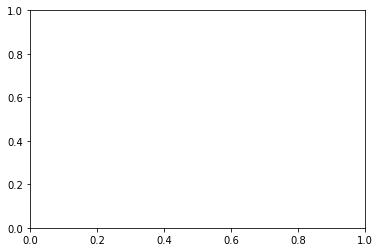

In [0]:
ae.fit(X,y)

In [0]:
from IPython.display import display, Image

In [0]:
imgs = ae.animate()

In [0]:
!ls experiments/AE_cifar10_latent_dim3_h_dim500_h_nl3

ls: cannot access 'experiments/AE_cifar10_latent_dim3_h_dim500_h_nl3': No such file or directory


In [0]:
ae.model.w_space_files

['experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space in epoch 1.jpg',
 'experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space in epoch 20.jpg',
 'experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space in epoch 40.jpg',
 'experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space in epoch 60.jpg',
 'experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space in epoch 80.jpg',
 'experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/AE_mnist_latent_dim3_h_dim500_h_nl3 W space in epoch 97.jpg']

In [0]:
animates = ['experiments/AE_cifar10_latent_dim3_h_dim500_h_nl3/AE_cifar10_latent_dim3_h_dim500_h_nl3 W space 3d in epoch_res_animate.gif', 'experiments/AE_cifar10_latent_dim3_h_dim500_h_nl3/AE_cifar10_latent_dim3_h_dim500_h_nl3 samples generation in epoch_res_animate.gif', 'experiments/AE_cifar10_latent_dim3_h_dim500_h_nl3/AE_cifar10_latent_dim3_h_dim500_h_nl3 W space in epoch_res_animate.gif']

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for animate in animates:
  image = mpimg.imread(animate)
  plt.imshow(image)
  plt.show()



FileNotFoundError: ignored

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.imshow(X[0])
plt.axis('off')

In [0]:
z1 = ae.encode(X[0:1])

Scaling dataset
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


1it [00:00, 15.39it/s]

Model loaded
EPOCHS trained:  98


In [0]:
z1.shape

(1, 3)

In [0]:
x1_const = ae.decode(z1)

Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


1it [00:00, 28.46it/s]

Model loaded
EPOCHS trained:  98


(-0.5, 27.5, 27.5, -0.5)

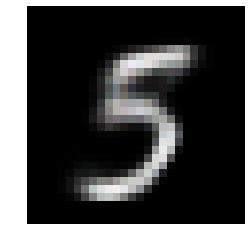

In [0]:
plt.imshow(x1_const[0])
plt.axis('off')

In [0]:
pred = ae.reconst_loss(X[0:100])

Scaling dataset
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


2it [00:00, 19.66it/s]               

Model loaded
EPOCHS trained:  98


In [0]:
pred.shape

(100, 1)

(-0.5, 27.5, 27.5, -0.5)

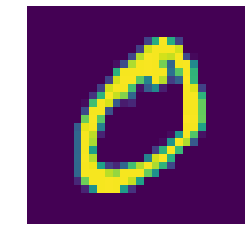

In [0]:
plt.imshow(X[1])
plt.axis('off')

In [0]:
int_imgs = ae.interpolate(X[0:100], X[200:300])

Scaling dataset
Scaling dataset
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


2it [00:00, 21.88it/s]               

Model loaded
EPOCHS trained:  98
Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750



2it [00:00, 33.94it/s]               

Model loaded
EPOCHS trained:  98


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


  0%|          | 0/1 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  98


2it [00:01,  1.14it/s]                       


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


  0%|          | 0/1 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  98


2it [00:01,  1.20it/s]                       


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


  0%|          | 0/1 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  98


2it [00:01,  1.21it/s]                       


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


  0%|          | 0/1 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  98


2it [00:01,  1.18it/s]                       


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


  0%|          | 0/1 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  98


2it [00:01,  1.14it/s]                       


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


  0%|          | 0/1 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  98


2it [00:01,  1.18it/s]                       


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


  0%|          | 0/1 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  98


2it [00:01,  1.18it/s]                       


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


  0%|          | 0/1 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  98


2it [00:01,  1.20it/s]                       


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


  0%|          | 0/1 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  98


2it [00:01,  1.19it/s]                       


Loading model checkpoint experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750 ...

INFO:tensorflow:Restoring parameters from experiments//AE_mnist_latent_dim3_h_dim500_h_nl3/-85750


  0%|          | 0/1 [00:00<?, ?it/s]

Model loaded
EPOCHS trained:  98


2it [00:01,  1.20it/s]                       


In [0]:
%load_ext autoreload
%autoreload 2
from utils.plots import merge
from scipy.misc import imresize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
scale = 5
im = merge(np.vstack(int_imgs), (len(int_imgs),12))
fig_width = int(im.shape[0] * scale)
fig_height = int(im.shape[1] * scale)

im = imresize(im, (fig_width, fig_height, 3))

KeyboardInterrupt: ignored

In [0]:
plt.figure(figsize = (len(imgs),24), dpi=70)
plt.imshow(im)
plt.axis('off')


In [0]:
import scipy.misc
scipy.misc.imsave(ae.model.summary_dir+'\\interpolate.jpg', im)